In [91]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# 读取数据

In [67]:
df = pd.read_csv("./data/泰坦尼克号/titanic_train.csv")


In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 处理数据

## 删除多余的特征

In [71]:
df.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [72]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## 将非数值型的转换为数值型

In [73]:
df['Sex'] = (df['Sex'] == 'male').astype('int')

In [74]:
# 查看Embarked的取值
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [75]:
labels = {
    'S': 0,
    'C': 1,
    'Q': 2
}
df['Embarked'] = df['Embarked'].map(labels)

## 处理缺失值

In [77]:
# 查看每个特征缺失值的数量
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [78]:
# 将Embarked的缺失值数据删除
df.drop(df[df['Embarked'].isnull()].index, inplace=True)

In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

### 使用随机森林对Age的缺失值进行填补

In [80]:
df_y_train = df['Age'][df['Age'].notnull()]

In [81]:
df_y_test = df['Age'][df['Age'].isnull()]

In [82]:
df_x = df.iloc[:, df.columns != 'Age']

In [83]:
df_x_train = df_x.loc[df_y_train.index, :]

In [84]:
df_x_test = df_x.loc[df_y_test.index, :]

In [85]:
df_x_test

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
5,6,0,3,1,0,0,8.4583,2.0
17,18,1,2,1,0,0,13.0000,0.0
19,20,1,3,0,0,0,7.2250,1.0
26,27,0,3,1,0,0,7.2250,1.0
28,29,1,3,0,0,0,7.8792,2.0
...,...,...,...,...,...,...,...,...
859,860,0,3,1,0,0,7.2292,1.0
863,864,0,3,0,8,2,69.5500,0.0
868,869,0,3,1,0,0,9.5000,0.0
878,879,0,3,1,0,0,7.8958,0.0


In [89]:
pd.DataFrame(df_y_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     712 non-null    float64
dtypes: float64(1)
memory usage: 11.1 KB


In [98]:
# 进行训练并填补异常值
clf = RandomForestRegressor(random_state=0, n_estimators=100)
clf = clf.fit(df_x_train, df_y_train)
df_y_test_p = clf.predict(df_x_test).astype('int')

In [101]:
df.loc[df_y_test.index, 'Age'] = df_y_test_p

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int32  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 106.0 KB


# 训练模型

In [103]:
y = df['Survived']
x = df.drop('Survived', axis=1)

In [109]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3)

In [111]:
rfc = RandomForestClassifier(random_state=0)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest, Ytest)

0.8689138576779026

0.8188840653728293 26


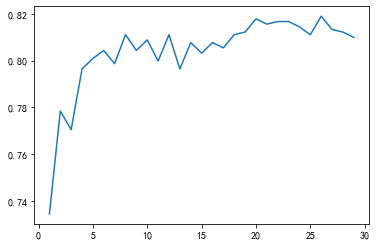

In [116]:
# 选取参数n_estimators
scores = []
for i in range(1, 30):
    rfc_test = RandomForestClassifier(random_state=0, n_estimators=i)
    score = cross_val_score(rfc_test, x, y, cv=10).mean()
    scores.append(score)

print(max(scores), scores.index(max(scores))+1)
plt.plot(range(1, 30), scores)
plt.show()

由上图以及输出值可以看出，n_estimators的最佳值为26

0.8380362614913176 9


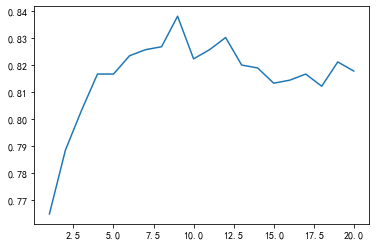

In [117]:
# 选取参数max_depth
scores = []
for i in range(1, 21):
    rfc_test = RandomForestClassifier(random_state=0, n_estimators=26, max_depth=i)
    score = cross_val_score(rfc_test, x, y, cv=10).mean()
    scores.append(score)

print(max(scores), scores.index(max(scores))+1)
plt.plot(range(1, 21), scores)
plt.show()

In [118]:
# 使用筛选的参数进行建模并测试
rfc = RandomForestClassifier(random_state=0, n_estimators=26, max_depth=9)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest, Ytest)

0.8539325842696629

# 处理需要预测的数据集并将预测结果写入文件

In [139]:
df_test = pd.read_csv("./data/泰坦尼克号/titanic_test.csv")

In [140]:
df_test.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [141]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [142]:
df_test['Sex'] = (df_test['Sex'] == 'male').astype('int')

In [143]:
df_test['Embarked'] = df_test['Embarked'].map(labels)

In [145]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,0
414,1306,1,0,39.0,0,0,108.9000,1
415,1307,3,1,38.5,0,0,7.2500,0
416,1308,3,1,NaN,0,0,8.0500,0


In [146]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 24.6 KB


## 对缺失值进行处理

In [173]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [174]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 24.6 KB


In [176]:
df_demo = df_test
y_demo = df_demo['Age']
df_demo = df_demo.iloc[:, df_demo.columns != 'Age']
# 分离训练集和预测集
y_demo_train = y_demo.loc[y_demo.notnull()]
y_demo_test = y_demo.loc[y_demo.isnull()]
x_demo_train = df_demo.loc[y_demo_train.index, :]
x_demo_test = df_demo.loc[y_demo_test.index, :]

rfc_demo = RandomForestRegressor(random_state=0, n_estimators=100)
rfc_demo = rfc_demo.fit(x_demo_train, y_demo_train)
y_demo_test = rfc_demo.predict(x_demo_test).astype('int')

In [182]:
df_test.loc[df_test['Age'].isnull(), 'Age'] = y_demo_test

In [186]:
rfc = RandomForestClassifier(random_state=0, max_depth=9, n_estimators=26)
rfc = rfc.fit(x, y)
y_submit = rfc.predict(df_test)

In [188]:
submit = pd.DataFrame(df_test['PassengerId'])
submit['Survived'] = y_submit

In [195]:
submit.set_index('PassengerId', inplace=True)

In [196]:
submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [201]:
submit.to_csv("./data/泰坦尼克号/titanic_test_submit.csv")